In [1]:
# This file is part of the project's source code.
# Copyright (c) 2026 Daniel Monzon.
# Licensed under the MIT License. See the LICENSE file in the repository root.

# RLC Circuit Analysis and Parametric Desing

### 0) Abstract

_This notebook provides a practical guide for the analysis and parametric design of a series RLC circuit using Python. It demonstrates the complete workflow from deriving the system's transfer function and assessing stability through pole analysis to designing component values based on desired damping ratio and natural frequency specifications. The implementation, using the Python Control Systems Library, allows for the calculation of circuit parameters, verification of dynamic behavior, and visualization of the step response, effectively bridging theoretical control engineering concepts with computational implementation._

### I) Objectives: 🎯 

To perform a theoretical analysis and computational parametric design (python) of a series RLC circuit, determining component values to satisfy given damping ratio and natural frequency specifications.

### II) Concise Circuit Theory: 🧮

___
*Note*: Significant **Calculus** knowledge is required to understand this section. 
___

Let's consider the following schematic circuit of a series RLC circuit:

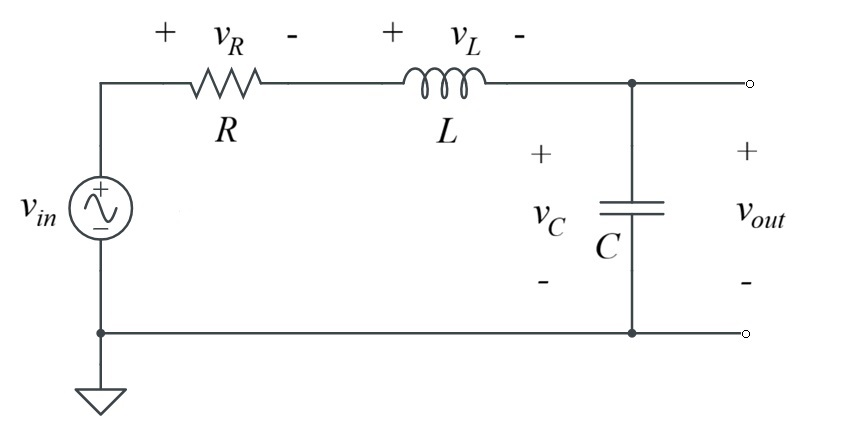

Applying the Kirchhoff's voltage law for the mesh in clockwise direction, we obtain:
$$ -v_{in}(t) + v_R(t) + v_L(t) + v_C(t) = 0 $$
but the following conditions holds,
$$ v_{R}(t) = Ri(t), v_{L} = L \frac{di(t)}{dt}, \text{ and } i(t) = C \frac{d v_C(t)}{dt} $$
where $ i(t) $ is the current flowing through the circuit. Then, doing algebraic manipulation it can be shown that the differential equation for the circuit can be expressed as follow,
$$ L C \ddot{v}_C(t) + R C \dot{v}_C(t) + v_C(t) = v_{in}(t). $$
However, establishing the classical parameters:
$$ \omega_n = \frac{1}{\sqrt{L C}}, $$
called the resonant angular frequency or just **natural frequency**, for simpler language, and
$$ \zeta = \frac{R}{2} \sqrt{\frac{C}{L}}, $$
called **damping ratio**, inserting them in the differential equation obtained earlier and, previously, dividing by $LC$, we can arrive to the following expression, that is the canonical form of the differential equation,
$$ \ddot{v}_C(t) + 2 \zeta \omega_n \dot{v}_C(t) + \omega_n^2 v_C(t) = \omega_n^2 v_{in}(t). $$
Now, if we apply the **Laplace transform** in both sides of this equation, assuming nulls initials conditions, we get,
$$ s^2V_{C}(s) + 2s\zeta\omega_{n}V_{C}(s) + \omega_n^2V_{C}(s) = \omega_n^2V_{in}(s). $$
For the last step, if we factorize $V_{C}(s)$ and manipulate to obtain the **transfer function**, $ H(s) = \frac{V_{out}}{V_{in}}, $ that is equal to $ \frac{V_{C}(s)}{V_{in}}$, we obtain
$$ H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2} $$
that is the standard form in control engineering. But finally, it can be shown that this form is equivalent to,
$$ H(s) = \frac{1}{L C s^2 + R C s + 1} $$



### III) Python Code Analysis: 📉⚙️

___
_Notes:_ 1) Execute `conda install -c conda-forge control` using the Anaconda prompt to install the `control` library. 2) Fundamental control engineering concepts are defined very briefly in the code, but depending on your background you might need to study them in a text book. There is a bibliographic section at the end of this jupyter notebook. 
___

Poles: [(-500+3122.5j), (-500-3122.5j)]


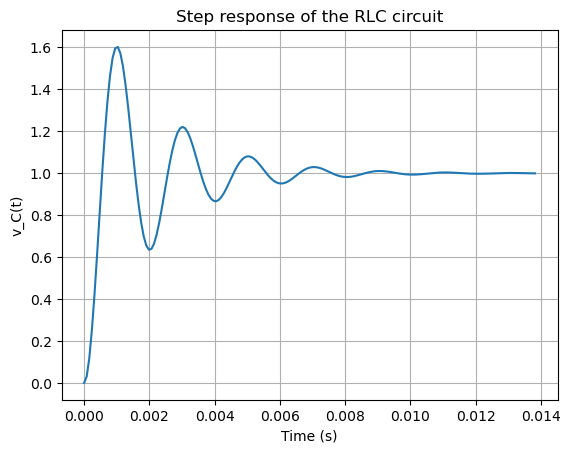

In [1]:
# Import the necessary libraries
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Establish the values of the physical magnitudes
R = 10.0      # In ohms
L = 10e-3     # In henrys
C = 10e-6     # In farads

# Construct the transfer function H(s). This function allows to know the forced response,
# the stability, the frequency response and the dynamical structure of the circuit.
num = [1]
den = [L*C, R*C, 1]

system = ctrl.TransferFunction(num, den)

# Determine the poles [i.e., the roots of the denominator of H(s)]. The poles location
# establish the stability and dynamic behavior of the circuit.
poles = ctrl.poles(system)

# Round the poles values to better visualization using list comprehension
rounded_poles = [
    complex(round(p.real, 2), round(p.imag, 2))
    for p in poles
]

# Display the poles rounded values
print("Poles:", rounded_poles)


# Compute the unit step response of the circuit. The unitarian step is
# defined as follows: u(t) = {1 if t >= 0; 0 if t < 0}
t, y = ctrl.step_response(system)

# Plot the step response
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("v_C(t)")
plt.title("Step response of the RLC circuit")
plt.grid()
plt.show()


We see that, after a oscilatory **transient response**, the circuit behaivor stabilize such that $v_{out} = v_{in}.$

### IV) a. Python Code for Design: Desing Specifications 📐💻

In engineering, _design_ is the **systematic**, **iterative** process of **conceiving**, **developing**, and **planning** a product, system, or process to meet desired needs and **constraints**. It is the core creative and analytical act that transforms a requirement into a detailed specification for building something that works reliably and efficiently.

Let's suppose that we want a RLC circuit to meet certain damping ratio and natural frequency specifications. This is implemented in the code below:

In [6]:
# DESIGN SPECIFICATIONS:

# Desired damping ratio
zeta_desired = 0.7

# Desired natural frequency (rad/s)
omega_n_desired = 3000

print("Design specifications:")
print(f"  Damping ratio (zeta): {zeta_desired}")
print(f"  Natural frequency (omega_n): {omega_n_desired} rad/s")

Design specifications:
  Damping ratio (zeta): 0.7
  Natural frequency (omega_n): 3000 rad/s


### IV) b. Python Code for Design: Compute dependent parameters and check new circuit behavior 🧠⚙️

Designed parameters:
  R = 42.00 Ω
  L = 1.00e-02 H
  C = 1.11e-05 F

System poles:
(-2100+2142.43j)
(-2100-2142.43j)


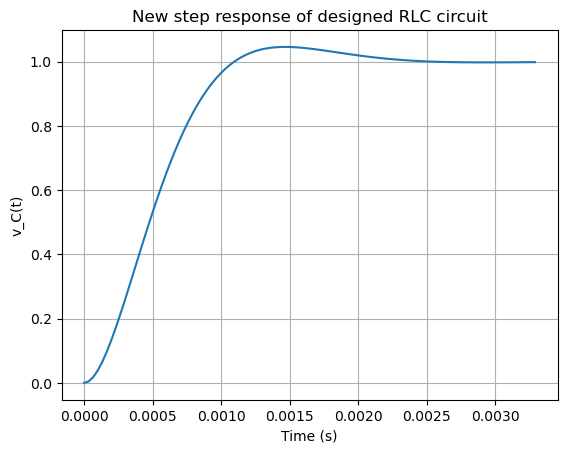

In [7]:
# PARAMETER CALCULATIONS

# Choose inductance (design choice)
L = 10e-3  # In henrys

# Compute capacitance from omega_n
C = 1 / (L * omega_n_desired**2)

# Compute resistance from zeta
R = 2 * zeta_desired * np.sqrt(L / C)

print("Designed parameters:")
print(f"  R = {R:.2f} \u03A9")
print(f"  L = {L:.2e} H")
print(f"  C = {C:.2e} F")

# CHECK NEW CIRCUIT BEHAVIOR 

num = [1]
den = [L*C, R*C, 1]

system = ctrl.TransferFunction(num, den)

# Poles (rounded)
poles = ctrl.poles(system)
rounded_poles = [complex(round(p.real, 2), round(p.imag, 2)) for p in poles]

print("\nSystem poles:")
for p in rounded_poles:
    print(p)

# Step response
t, y = ctrl.step_response(system)

plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("v_C(t)")
plt.title("New step response of designed RLC circuit")
plt.grid()
plt.show()


Having made the design changes, we see that the transient response is less oscillatory and has a lower overshoot, stabilizing faster.

### V) Bibliography: 📖

1. Hayt, W. H., Kemmerly, J. D., & Durbin, S. M. (2024). Engineering circuit analysis (10th ed.). McGraw-Hill Education.
2. Roberts, M. J. (2017). Signals and systems: Analysis using transform methods and MATLAB (3rd ed.). McGraw-Hill Education.
3. Franklin, G. F., Powell, J. D., & Emami-Naeini, A. (2024). Feedback control of dynamic systems (9th ed.). Pearson.